In [4]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os.path
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#creating dataframes for the .csv files
length_1000 = pd.read_csv(os.getcwd() + "\\project_files\\length_1000.csv")
length_1200 = pd.read_csv(os.getcwd() + "\\project_files\\length_1200.csv")
length_1400 = pd.read_csv(os.getcwd() + "\\project_files\\length_1400.csv")
length_1600 = pd.read_csv(os.getcwd() + "\\project_files\\length_1600.csv")
length_1650 = pd.read_csv(os.getcwd() + "\\project_files\\length_1650.csv")
length_1800 = pd.read_csv(os.getcwd() + "\\project_files\\length_1800.csv")

## Dataframe Refining for Research: Measuring Slipstreaming
##### I have decided to drop lengths 2000, 2200 and 2400 due to lack of data. Choosing to keep the others as they have 1000 or more entires.

In [6]:
#creating a function to handle dropping the unneeded rows for the research question
def df_refine_section3(df):
    df = df.drop(['Unnamed: 0', 'track_condition', 'actual_weight','jockey','declared_horse_weight', 'horse_id', 'race_course', 'race_name', 'track', 'src', 'race_date', 'race_number', 'race_class', 'trainer', 'draw', 'length_behind_winner', 'win_odds', 'sectional_time', 'incident_report', 'horse_number', 'running_position_2', 'running_position_3'], axis=1)
    return df

def df_refine_section4(df):
    df = df.drop(['Unnamed: 0', 'track_condition', 'actual_weight','jockey','declared_horse_weight', 'horse_id', 'race_course', 'race_name', 'track', 'src', 'race_date', 'race_number', 'race_class', 'trainer', 'draw', 'length_behind_winner', 'win_odds', 'sectional_time', 'incident_report', 'horse_number', 'running_position_2', 'running_position_3', 'running_position_4'], axis=1)
    return df

def df_refine_section5(df):
    df = df.drop(['Unnamed: 0', 'track_condition', 'actual_weight','jockey','declared_horse_weight', 'horse_id', 'race_course', 'race_name', 'track', 'src', 'race_date', 'race_number', 'race_class', 'trainer', 'draw', 'length_behind_winner', 'win_odds', 'sectional_time', 'incident_report', 'horse_number', 'running_position_2', 'running_position_3', 'running_position_4', 'running_position_5'], axis=1)
    return df

In [7]:
#creating the dataframes to handle the various race lengths
section1_1000 = df_refine_section3(length_1000)
section1_1200 = df_refine_section3(length_1200)
section1_1400 = df_refine_section4(length_1400)
section1_1600 = df_refine_section4(length_1600)
section1_1650 = df_refine_section4(length_1650)
section1_1800 = df_refine_section5(length_1800)

In [8]:
#creating a function to handle the various strings found within the finishing_position column, -1 represents a DNF value
def no_more_strings(df):
    stringarray=['DH', 'UR', 'PU', 'FE', 'DNF', 'DISQ']
    for string in stringarray:
        df['finishing_position'] = df['finishing_position'].str.replace(" ","")
        if string == 'DH':
            df['finishing_position'] = df['finishing_position'].str.replace(string, '')
        else:
            df['finishing_position'] = df['finishing_position'].str.replace(string, '-1')
    return df

In [9]:
#cleaning the finishing_positon column of strings using a function created above
section1_1000 = no_more_strings(section1_1000)
section1_1200 = no_more_strings(section1_1200)
section1_1400 = no_more_strings(section1_1400)
section1_1600 = no_more_strings(section1_1600)
section1_1650 = no_more_strings(section1_1650)
section1_1800 = no_more_strings(section1_1800)

In [10]:
#creating a function to handle the data type conversation of finishing_position to float accross all dataframes
def finishing_position_conversion(df):
    df['finishing_position'] = df['finishing_position'].astype(float)
    df['race_distance'] = df['race_distance'].astype(float)
    return df

In [11]:
#converting the data type of finishing_position to float across all dataframes using the function above
section1_1000 = finishing_position_conversion(section1_1000)
section1_1200 = finishing_position_conversion(section1_1200)
section1_1400 = finishing_position_conversion(section1_1400)
section1_1600 = finishing_position_conversion(section1_1600)
section1_1650 = finishing_position_conversion(section1_1650)
section1_1800 = finishing_position_conversion(section1_1800)

## Dataframe Creation: Slipstreamer and Tailgater Definition
##### In a previous visualisation from aother notebook; we see that on average horses that finished in first place on average held a middle of the pack position for section 1 and likewise for section 2. This would suggest that while slipstreaming is happening, there's a limit to how far back a horse can go before they fall too far behind to make up the ground. Kind of like a goldilocks zone, it shows that horses in 14th positon in the last section of a race are most likley not going to win, however it also shows that frontrunners rarely win the race also. More often horses that win hold a top 6 position coming into the final section and sprint for the win from there. This has made me reconsider my definition of slipstreaming and am choosing to represent slipstreamers from now as horses holding a 4th-8th position and naming everyone behind slipstreamers as tailgaters which will be represented as any horse with a position of >=9. This allows us to plot the visualisation without being worried about tailgaters dragging down the average needlessly.

In [12]:
#creating functions to create dataframes out of slipstreamers
def slipstreamer(df):
    df = df.loc[(df['running_position_1'] >= 4.0) & (df['running_position_1'] <= 8)]
    return df

def tailgater(df):
    df = df.loc[(df['running_position_1'] >= 9.0)]
    return df

In [13]:
#creating dataframes to handle slipstreamers
slipstreamer_1000 = slipstreamer(section1_1000)
slipstreamer_1200 = slipstreamer(section1_1200)
slipstreamer_1400 = slipstreamer(section1_1400)
slipstreamer_1600 = slipstreamer(section1_1600)
slipstreamer_1650 = slipstreamer(section1_1650)
slipstreamer_1800 = slipstreamer(section1_1800)

#creating dataframes to handle tailgaters
tailgater_1000 = tailgater(section1_1000)
tailgater_1200 = tailgater(section1_1200)
tailgater_1400 = tailgater(section1_1400)
tailgater_1600 = tailgater(section1_1600)
tailgater_1650 = tailgater(section1_1650)
tailgater_1800 = tailgater(section1_1800)

##### For the visualisation, I have decided to concat all the slipstreamer_x dataframes together into one.

In [14]:
#joining various dataframes into one
slipstreamers = pd.concat([slipstreamer_1000,slipstreamer_1200, slipstreamer_1400, slipstreamer_1600, slipstreamer_1650, slipstreamer_1800],ignore_index=True)
tailgaters = pd.concat([tailgater_1000, tailgater_1200, tailgater_1400, tailgater_1600, tailgater_1650, tailgater_1800],ignore_index=True)

## Visualisations:
##### Below I will attempt to plot a scatterplot with the line showcasing the relationship between a horses position in section 1 vs the finishing position of the race. My thoughts are that this should show if slipstreaming is present throughout the race by pointing out the improvement of positions of horses from the start of the race to the finish line.

##### Edit: Unfortunately; As we can see below, the data I am using doesn't lend itself well to scatterplots. Since the data type is positional data in a race (1-14), once the sample size goes above a certain point there becomes occurances for every single point and therefore doesn't provide any useful data.

[Text(32.983529904513894, 0.5, 'Finishing Position'),
 Text(0.5, 23.006875000000008, 'End of Section 1 Position')]

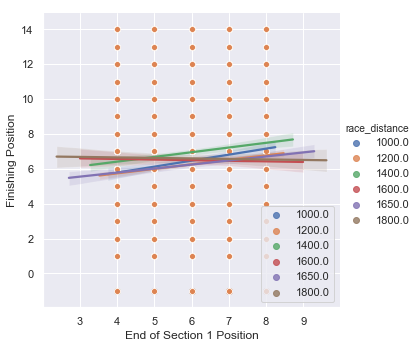

In [15]:
#plotting the scatter plot
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (10, 7)})
sns.lmplot(x="running_position_1", y="finishing_position", hue="race_distance", data = slipstreamers)
ax = sns.scatterplot(x="running_position_1", y= "finishing_position", data = slipstreamers)
ax.set(xlabel='End of Section 1 Position', ylabel='Finishing Position')
#plt.tight_layout()
#plt.savefig('measuring_slipstream.jpeg')

##### After seeing how the scatterplot looked after implementation I decided to use a factorplot to show the relationship of slipstreaming. The lines used show the same data as above but without the scatter markers being in every possible occurance and is generally better and easier to understand.

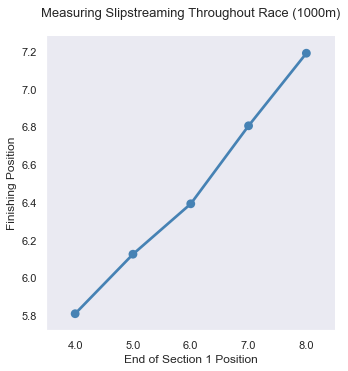

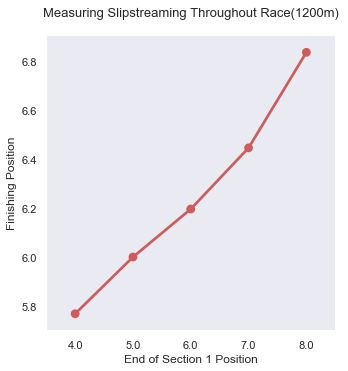

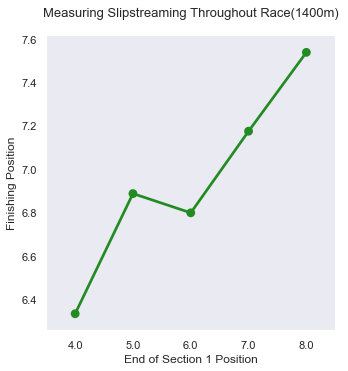

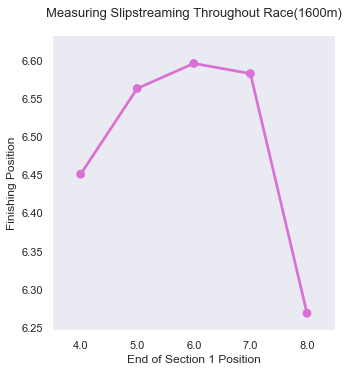

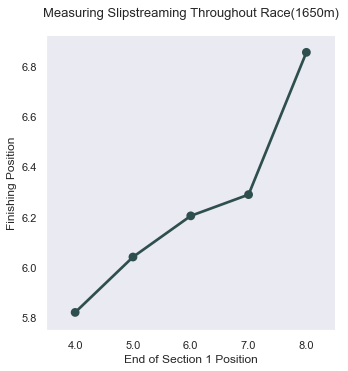

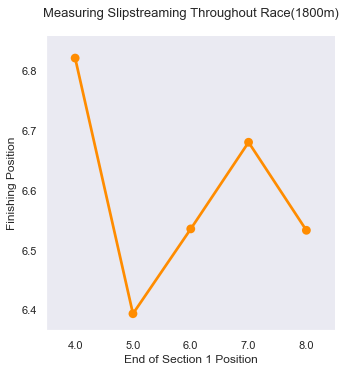

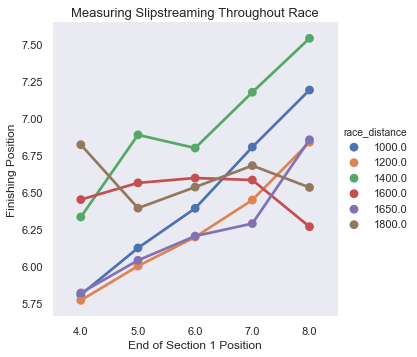

In [16]:
#factorplot to show slipstreaming effect for slipstreamers across multiple lengths of race not including 2000, 2200, 2400 due to lack of data
#1000m
sns.set(style="dark")
ax = sns.factorplot(x='running_position_1',y='finishing_position', color = 'steelblue', data=slipstreamer_1000, ci=False)
plt.title('Measuring Slipstreaming Throughout Race (1000m)\n', fontsize = 13)
ax.set(xlabel='End of Section 1 Position', ylabel='Finishing Position')

#1200m
sns.set(style="dark")
ax = sns.factorplot(x='running_position_1',y='finishing_position', color = 'indianred', data=slipstreamer_1200, ci=False)
plt.title('Measuring Slipstreaming Throughout Race(1200m)\n', fontsize = 13)
ax.set(xlabel='End of Section 1 Position', ylabel='Finishing Position')

#1400m
sns.set(style="dark")
ax = sns.factorplot(x='running_position_1',y='finishing_position', color = 'forestgreen', data=slipstreamer_1400, ci=False)
plt.title('Measuring Slipstreaming Throughout Race(1400m)\n', fontsize = 13)
ax.set(xlabel='End of Section 1 Position', ylabel='Finishing Position')

#1600m
sns.set(style="dark")
ax = sns.factorplot(x='running_position_1',y='finishing_position', color = 'orchid', data=slipstreamer_1600, ci=False)
plt.title('Measuring Slipstreaming Throughout Race(1600m)\n', fontsize = 13)
ax.set(xlabel='End of Section 1 Position', ylabel='Finishing Position')

#1650m
sns.set(style="dark")
ax = sns.factorplot(x='running_position_1',y='finishing_position', color = 'darkslategrey', data=slipstreamer_1650, ci=False)
plt.title('Measuring Slipstreaming Throughout Race(1650m)\n', fontsize = 13)
ax.set(xlabel='End of Section 1 Position', ylabel='Finishing Position')

#1800m
sns.set(style="dark")
ax = sns.factorplot(x='running_position_1',y='finishing_position', color = 'darkorange', data=slipstreamer_1800, ci=False)
plt.title('Measuring Slipstreaming Throughout Race(1800m)\n', fontsize = 13)
ax.set(xlabel='End of Section 1 Position', ylabel='Finishing Position')

#all race lengths
sns.set(style="dark")
ax = sns.factorplot(x='running_position_1',y='finishing_position', hue="race_distance", data=slipstreamers, ci=False)
plt.title('Measuring Slipstreaming Throughout Race', fontsize = 13)
ax.set(xlabel='End of Section 1 Position')
ax.set(ylabel='Finishing Position')
plt.savefig('effect_of_slip_slipstreamer_pres.jpeg')

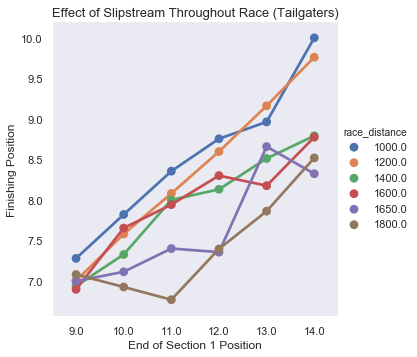

In [17]:
#factorplot to show slipstreaming effect for tailgaters (position >=9) across multiple lengths of race not including 2000, 2200, 2400 due to lack of data
sns.set(style="dark")
ax = sns.factorplot(x='running_position_1',y='finishing_position', hue="race_distance", data=tailgaters, ci=False)
plt.title('Effect of Slipstream Throughout Race (Tailgaters)', fontsize = 13)
ax.set(xlabel='End of Section 1 Position', ylabel='Finishing Position')
plt.savefig('effect_of_slip_tail_pres.jpeg')

## Conclusion:
##### In conclusion, on average it looks like slipstreaming doesn't have a massive effect across the races we see here with most horses in a top 5 position actually falling back and ultimately the further back in the pack we go we see an increase in their position. This question has been a rather big regression to the mean and I think it's worth while mentioning a few limitations that I have learnt and felt since starting this research question. Firstly, it's worth noting that using positional data, in theory sounds like a good way to see if slipstreaming had an effect in a race, ultimately with data such as this we find that everything regresses towards the mean. Secondly, with what I know now I would attempt to look at the slipstreaming effect from data collected with sensors attached to the horse that can actually measure the aerodynamic drag throughout the race and potentially have gps data that shows their position in relation to other horses in the race. I think its also worth mentioning that while I feel there's some regression to the mean here, the reason why in this context is the simple number of chances provided in the sense that out of the top 4 people, there's only one chance for first place to maintain that first place, and three chances for him to fall behind so to speak.